# SIT742: Modern Data Science 
**(2020 Assessment Task 02: Exploration FIFA2019 Data)**

---
- Materials in this module include resources collected from various open-source online repositories.
- You are free to use, change and distribute this package.

Prepared by **SIT742 Teaching Team**


---

<div class="alert alert-block alert-info">
Enter your information in the following cell. Please make sure you fill your Student ID and Name correctly.  
</div>

**Student Group Information:** Please fill your information below

- Names with Student IDs:  
- Group ID:  
- Emails:   

---

## Overview

Recently, [Kaggle](https://www.kaggle.com) (a data science community and competition platform) released one data set '[FIFA19](https://www.kaggle.com/karangadiya/fifa19)‘, which consists of 18K+ FIFA 19 player with around 90 attributes extracted from FIFA database. In this assessment task, we make it available as the data set:
- [2020T2Data.csv](https://github.com/tulip-lab/sit742/raw/master/Assessment/2020/data/2020T2Data.csv): The data set for this assignment task.

In this task, you will need to **use Spark packages**

- **Part 1**: Exploratory Data Analysis

- **Part 2**: Clustering Analysis, and identify the position profiles of each cluster

- **Part 3**: Classification Analysis, and evaluate the performance of different algorithms using cross validation;


You will be required to complete the coding to answer the questions with a neat and clean format, and your commenting and adherence to code standards will be considered when marking. Further information on Python standards, please visit https://www.python.org/dev/peps/pep-0008/ 


**Note**: You are not necessary to stick to the partial code provided, and you can write your own complete code to implement the required tasks. But you should provide sufficient comments.



## Part 1 - What we could know about FIFA 2019 Players? 

### 1.0. Libraries and data files
<a id="Load data"></a>
***

Import the necessary Spark environment, and load the data set [2020T2Data.csv](https://github.com/tulip-lab/sit742/raw/master/Assessment/2020/data/2020T2Data.csv).


In [1]:
!pip install wget
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q https://archive.apache.org/dist/spark/spark-2.4.0/spark-2.4.0-bin-hadoop2.7.tgz
!tar xf spark-2.4.0-bin-hadoop2.7.tgz
!pip install -q findspark
import os,wget
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-2.4.0-bin-hadoop2.7"


link_to_data = 'https://github.com/tulip-lab/sit742/raw/master/Assessment/2020/data/2020T2Data.csv'
DataSet = wget.download(link_to_data)

  Created wheel for wget: filename=wget-3.2-cp36-none-any.whl size=9682 sha256=90488c01d0fc2a1bf2e4596f3a20c23a68d9bf31fbd4e08a740f1ec7684fbb85
  Stored in directory: /root/.cache/pip/wheels/40/15/30/7d8f7cea2902b4db79e3fea550d7d7b85ecb27ef992b618f3f
Successfully built wget


In [0]:
import findspark
findspark.init()
from pyspark.sql import SparkSession

### 1.1 Data Exploration

*Remind: You must only use **PySpark** to complete the following data processing and model building. Otherwise, you lose all marks.*

<a id="loading"></a>
***

<div class="alert alert-block alert-info">

**Code**: 
    import the csv file as a Spark dataframe and name it as df

</div>



In [0]:
# Import the '2020T2Data.csv' as a Spark dataframe and name it as df
spark = SparkSession.builder.appName('SIT742T2').getOrCreate()

# Your Code 
#from google.colab import files
#uploaded = files.upload()
file_path= '2020T2Data.csv'
df= spark.read.csv(path= file_path, header=True)


**Checking schema and visualizing data**

In [4]:
from pyspark.sql import functions as F

df.columns
print('print schema')
df.printSchema()
print('print sample data')
df.show(2)




print schema
root
 |-- ID: string (nullable = true)
 |-- Name: string (nullable = true)
 |-- Age: string (nullable = true)
 |-- Photo: string (nullable = true)
 |-- Nationality: string (nullable = true)
 |-- Flag: string (nullable = true)
 |-- Overall: string (nullable = true)
 |-- Potential: string (nullable = true)
 |-- Club: string (nullable = true)
 |-- Club Logo: string (nullable = true)
 |-- value(M): string (nullable = true)
 |-- wage(K): string (nullable = true)
 |-- Special: string (nullable = true)
 |-- Preferred Foot: string (nullable = true)
 |-- International Reputation: string (nullable = true)
 |-- Weak Foot: string (nullable = true)
 |-- Skill Moves: string (nullable = true)
 |-- Work Rate: string (nullable = true)
 |-- Body Type: string (nullable = true)
 |-- Real Face: string (nullable = true)
 |-- Position: string (nullable = true)
 |-- Jersey Number: string (nullable = true)
 |-- Joined: string (nullable = true)
 |-- Loaned From: string (nullable = true)
 |-- Contra

****


<div class="alert alert-block alert-info">

**Code**: 
    Check statistics (min, mean and max) for features on Age, Overall. Then find out the Avg Overall on Position, Avg Overall on Nationality (Sort by avg Overall on Nationality)

<div class="alert alert-block alert-warning">
    
**Report**: 
    **1.1.A** Please answer questions with proper section title  '1.1.A':     
    <ol>
        <li> Which are the (min, mean and max) for Age </li>
        <li> Which are the (min, mean and max) for Overall </li>
        <li> Which position the talented player (based on Avg Overall) are playing? </li>
        <li> Which are the top 3 countres that most likely have the genies player (based on sort of Avg Overall) and </li>
    </ol>
</div>
</div>

#### Section 1.1.A: Summary Statistics

**Summary statistics on age**

In [5]:
#Your code for statistics on Age
import pyspark.sql.functions as fn

df.agg(fn.mean('Age').alias('Mean age'),fn.min('Age').alias('Min age'),fn.max('Age').alias('Max age') ).show()



#df.select('Age').agg('Age': F.mean).show()

+------------------+-------+-------+
|          Mean age|Min age|Max age|
+------------------+-------+-------+
|25.122205745043114|     16|     45|
+------------------+-------+-------+



**Inference:**
- The Mean, max and min of age can be summarised as above

**Summary statistics on overall:**

In [6]:
#Your Code for statistics on Overall

df.agg(fn.mean('Overall').alias('Mean Overall'),fn.min('Overall').alias('Min Overall'),fn.max('Overall').alias('Max Overall') ).show()


+-----------------+-----------+-----------+
|     Mean Overall|Min Overall|Max Overall|
+-----------------+-----------+-----------+
|66.23869940132916|         46|         94|
+-----------------+-----------+-----------+



**Inference**:
- The Mean, max and min of Overall can be summarised as above

**Finding Position for highest average overall**

In [7]:
#Your Code for which position 
#df[['Overall']].cast("double")
#df.groupBy('Position').mean('Overall').sort("count", ascending=False).show()
df.createTempView('table')
query= """
with position_rank as
(
select Position, avg(Overall) as Ov
 from table
 group by Position
 order by Ov desc
 )
 select Position
 from position_rank
 limit 1
 """
df5= spark.sql(query).show()



+--------+
|Position|
+--------+
|      LF|
+--------+



**Inference**:
- LF has highest average overall

**Top 3 countries most likely having good players**

In [8]:
#Your Code to output top 3 countries most likely having good players
query= """
with country_rank as
(
select Nationality, avg(Overall) as Ov
 from table
 group by Nationality
 order by Ov desc
 )
 select Nationality
 from country_rank
 limit 3
 """



df5= spark.sql(query).show()


+--------------------+
|         Nationality|
+--------------------+
|United Arab Emirates|
|Central African Rep.|
|              Israel|
+--------------------+



**Inference:**
Top 3 countries are: UAE, Central African Rep. and Israel

****

<div class="alert alert-block alert-info">

**Code**: 
    You are required to find out the Avg Potentials on Country by Positions, and show the top 10 by ordering your results on Country with alphabet? (Hint: you may need to use pivot)

<div class="alert alert-block alert-warning">
    
**Report**: 
    **1.1.B** Please answer questions with proper section title  '1.1.B':     
    <ol>
        <li> Show the results on Avg Potentials on Country by Position with ordering the results on country by alphabet</li>
        <li> Which position the young talented player (by Avg Potential) are playing in Australia? </li>
    </ol>
    
</div>
</div>

#### Section 1.1.B: Average potentials on country by position

In [9]:
#Your code to identify top 10 countries by alphabet


import pyspark.sql.functions as fn

df.groupby('Nationality').pivot('Position').agg(fn.mean('Potential').alias('AP')).sort('Nationality').show(10)

 


#Your Code to identify which position has the most talend young players in Australia

df.filter(df.Nationality == "Australia").groupby('Position').agg(fn.mean('Potential').alias('AP')).sort('AP', ascending= False).select('Position').show(1)


+-----------------+----+-----------------+-----------------+-----------------+----+-----------------+-----------------+----+-----------------+-----------------+-----------------+-----------------+----+-----------------+-----------------+-----------------+-----+----+-----------------+-----------------+-----------------+-----------------+----+-----------------+-----------------+-----------------+----+-----------------+
|      Nationality|null|              CAM|               CB|              CDM|  CF|               CM|               GK| LAM|               LB|              LCB|              LCM|              LDM|  LF|               LM|               LS|               LW|  LWB| RAM|               RB|              RCB|              RCM|              RDM|  RF|               RM|               RS|               RW| RWB|               ST|
+-----------------+----+-----------------+-----------------+-----------------+----+-----------------+-----------------+----+-----------------+----------------

**Inference**:
- Top 10 countries by alphabed according to average potential in each position has been summaries as above
- In Australia, the player with most avg potential play in RDM position

Interesting, is there a age that the player is fully relased his potential? If there is, could you find out?

****

<div class="alert alert-block alert-info">

**Code**: 
    You are required to plot the finding visually by having Age as the x-axis and avg potential on age with avg overall on age at y-axis. (Hint: you may need to select and aggreate on data first and then turn it into pandas for plotting)

<div class="alert alert-block alert-warning">
    
**Report**: 
    **1.1.C** Please include the following plot into your report with proper section title  '1.1.C':     
    <ol>
        <li> Plot the finding visually by having Age as the x-axis and avg potential on age with avg overall on age at y-axis. </li>
        <li> What you can find for the age at which the player is fully released his potential?
    </ol>
    
</div>
</div>

#### Section 1.1.3: Age for reaching full potential

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


+---+------------------+
|Age|                AO|
+---+------------------+
| 16| 54.45238095238095|
| 17| 56.40484429065744|
| 18| 57.74180327868852|
| 19|     59.5830078125|
| 20|61.858870967741936|
| 21| 63.48067463106114|
| 22| 64.99402985074627|
| 23| 66.24474474474475|
| 24| 67.30633284241532|
| 25| 67.97346474601972|
| 26| 68.51478010093727|
| 27| 68.94922547332186|
| 28| 69.21344232515895|
| 29|  69.2460896767466|
| 30| 69.69574700109051|
| 31| 69.85007072135785|
| 32| 69.52961672473867|
| 33| 69.55882352941177|
| 34| 69.53960396039604|
| 35| 68.13265306122449|
+---+------------------+
only showing top 20 rows



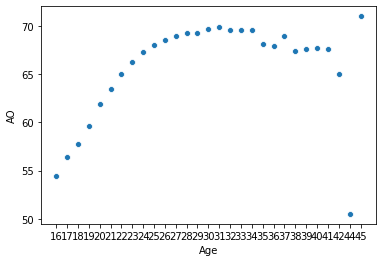

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# Your Code for plot
df.select('Age', 'Overall').groupby('Age').agg(fn.mean('Overall').alias('AO')).sort('Age').show()
pdf= df.select('Age', 'Overall').groupby('Age').agg(fn.mean('Overall').alias('AO')).sort('Age').toPandas()

#pdf is a pandas dataframe

sns.scatterplot(data= pdf, x= "Age", y= "AO")







**Inference**:
- The player reaches saturation in potential at around age of 28.
Based upon data, the highest average potential(69.85) is reached at the age of 31.

- At age of 45, there is datapoint showing higher potential but that is an outlier

## Part 2 - Unsupervised Learning: Kmeans

<a id="kmeans"></a>
***

In this part, you are required to build a Kmeans clustering for explore the player segmentation. 


### 2.1 Data Preparation

*Remind: You must only use **pyspark** to complete the following data processing and model building. Otherwise, you lose all marks.*


****

<div class="alert alert-block alert-info">

**Code**: 
    You will need to remove the Goal Keepers (Position = 'GK') and only use the skillset attributes (Height(CM),
Weight(KG),
Crossing,
Finishing,
HeadingAccuracy,
ShortPassing,
Volleys,
Dribbling,
Curve,
FKAccuracy,
LongPassing,
BallControl,
Acceleration,
SprintSpeed,
Agility,
Reactions,
Balance,
ShotPower,
Jumping,
Stamina,
Strength,
LongShots,
Aggression,
Interceptions,
Positioning,
Vision,
Penalties,
Composure,
Marking,
StandingTackle,
SlidingTackle) 

</div>



**Removing Goalkeeper and keeping only skillset attributes**

In [11]:
# Your code to select relevent features and filtering by leaving out the GK
df_cluster= df.select('Height(CM)','Weight(KG)','Crossing','Finishing','HeadingAccuracy','ShortPassing','Volleys','Dribbling','Curve','FKAccuracy','LongPassing','BallControl','Acceleration','SprintSpeed','Agility','Reactions','Balance','ShotPower','Jumping','Stamina','Strength','LongShots','Aggression','Interceptions','Positioning','Vision','Penalties','Composure','Marking','StandingTackle','SlidingTackle','Position','ID').filter(df.Position != 'GK')
df_cluster.show(5)

+----------+----------+--------+---------+---------------+------------+-------+---------+-----+----------+-----------+-----------+------------+-----------+-------+---------+-------+---------+-------+-------+--------+---------+----------+-------------+-----------+------+---------+---------+-------+--------------+-------------+--------+------+
|Height(CM)|Weight(KG)|Crossing|Finishing|HeadingAccuracy|ShortPassing|Volleys|Dribbling|Curve|FKAccuracy|LongPassing|BallControl|Acceleration|SprintSpeed|Agility|Reactions|Balance|ShotPower|Jumping|Stamina|Strength|LongShots|Aggression|Interceptions|Positioning|Vision|Penalties|Composure|Marking|StandingTackle|SlidingTackle|Position|    ID|
+----------+----------+--------+---------+---------------+------------+-------+---------+-----+----------+-----------+-----------+------------+-----------+-------+---------+-------+---------+-------+-------+--------+---------+----------+-------------+-----------+------+---------+---------+-------+--------------

To make the later stage easier, we define the position group by using the position feature.
- DEF = [LB,LWB,RB,LCB,RCB,CB,RWB] ,
- FWD = [RF,LF,LW,RS,RW,LS,CF,ST] ,
- MID = [LCM,LM,RDM,CAM,RAM,RCM,CM,CDM,RM,LAM,LDM]

****

<div class="alert alert-block alert-info">

**Code**: 
    You are required to create a new column called Position_Group with only DEF/FWD/MID in the dataframe you created in previous question

</div>

</div>

**Creating Position group feature**

In [12]:
from pyspark.sql.functions import when,col

# Your code to complete
DEF = ['LB','LWB','RB','LCB','RCB','CB','RWB'] 
FWD = ['RF','LF','LW','RS','RW','LS','CF','ST']
MID = ['LCM','LM','RDM','CAM','RAM','RCM','CM','CDM','RM','LAM','LDM']

# Your code here to create a new variable df_kmeans_new with a new column Position_Group, ..
#df_kmeans_new= df.withColumn("Position_Group", when(col("Position").isin(DEF),"DEF").when(col("Position").isin(MID),"MID").otherwise(when(col("Position").isin(FWD),"FWD")))
df_kmeans_new= df_cluster.withColumn("Position_Group", when(col("Position").isin(DEF),"DEF").when(col("Position").isin(MID),"MID").otherwise(when(col("Position").isin(FWD),"FWD")))

df_kmeans_new.show(3)
#df_kmeans_new.printSchema()
#df.printSchema()


+----------+----------+--------+---------+---------------+------------+-------+---------+-----+----------+-----------+-----------+------------+-----------+-------+---------+-------+---------+-------+-------+--------+---------+----------+-------------+-----------+------+---------+---------+-------+--------------+-------------+--------+------+--------------+
|Height(CM)|Weight(KG)|Crossing|Finishing|HeadingAccuracy|ShortPassing|Volleys|Dribbling|Curve|FKAccuracy|LongPassing|BallControl|Acceleration|SprintSpeed|Agility|Reactions|Balance|ShotPower|Jumping|Stamina|Strength|LongShots|Aggression|Interceptions|Positioning|Vision|Penalties|Composure|Marking|StandingTackle|SlidingTackle|Position|    ID|Position_Group|
+----------+----------+--------+---------+---------------+------------+-------+---------+-----+----------+-----------+-----------+------------+-----------+-------+---------+-------+---------+-------+-------+--------+---------+----------+-------------+-----------+------+---------+--

Now, we remove the Position_Group and Position to create the feature for Kmeans




**Preparing final data for clustering by creating vector objects**

In [13]:
from pyspark.ml.clustering import KMeans
from pyspark.ml.feature import VectorAssembler
df_kmeans_new.printSchema()
FEATURES_COL = ['Height(CM)', 'Weight(KG)', 
                      'Crossing', 'Finishing', 'HeadingAccuracy', 
                      'ShortPassing', 'Volleys', 'Dribbling', 'Curve',
                      'FKAccuracy', 'LongPassing', 'BallControl', 
                      'Acceleration', 'SprintSpeed', 'Agility', 
                      'Reactions', 'Balance', 'ShotPower', 'Jumping', 
                      'Stamina', 'Strength', 'LongShots', 'Aggression', 
                      'Interceptions', 'Positioning', 'Vision', 'Penalties', 
                      'Composure', 'Marking', 'StandingTackle', 'SlidingTackle']

df_kmeans_new.show()
filter= FEATURES_COL+['ID']
for col in df_kmeans_new.columns:
    if col in FEATURES_COL:
        df_kmeans_new = df_kmeans_new.withColumn(col,df_kmeans_new[col].cast('float'))
df_kmeans_new.show()
df_kmeans_new.count()

from pyspark.sql.functions import isnan, when, count, col
df_kmeans= df_kmeans_new.select(FEATURES_COL+['ID'])
df_kmeans = df_kmeans.na.drop()


vecAssembler = VectorAssembler(inputCols=FEATURES_COL, outputCol="features")
df_kmeans = vecAssembler.transform(df_kmeans).select('ID','features')
df_kmeans.show(3)


root
 |-- Height(CM): string (nullable = true)
 |-- Weight(KG): string (nullable = true)
 |-- Crossing: string (nullable = true)
 |-- Finishing: string (nullable = true)
 |-- HeadingAccuracy: string (nullable = true)
 |-- ShortPassing: string (nullable = true)
 |-- Volleys: string (nullable = true)
 |-- Dribbling: string (nullable = true)
 |-- Curve: string (nullable = true)
 |-- FKAccuracy: string (nullable = true)
 |-- LongPassing: string (nullable = true)
 |-- BallControl: string (nullable = true)
 |-- Acceleration: string (nullable = true)
 |-- SprintSpeed: string (nullable = true)
 |-- Agility: string (nullable = true)
 |-- Reactions: string (nullable = true)
 |-- Balance: string (nullable = true)
 |-- ShotPower: string (nullable = true)
 |-- Jumping: string (nullable = true)
 |-- Stamina: string (nullable = true)
 |-- Strength: string (nullable = true)
 |-- LongShots: string (nullable = true)
 |-- Aggression: string (nullable = true)
 |-- Interceptions: string (nullable = true)
 

Now in order to evaluate your Kmeans Model, please plot the elbow plot


<div class="alert alert-block alert-info">

**Code**: 
    You are required to plot the elbow plot, with a varying K from 2 to 20.

<div class="alert alert-block alert-warning">
    
**Report**: 
    **2.1** In your report with proper section title  '2.1', Please include the elbow plot. 

</div>
</div>



### Section 2.1: Elbow plot for finding optimal number of k

In [0]:
#@title
cost = np.zeros(20)
# Your code
for k in range(2,20):
  kmeans = KMeans().setK(k).setSeed(1).setFeaturesCol("features")
  model = kmeans.fit(df_kmeans.sample(False,0.1, seed=42))
  cost[k] = model.computeCost(df_kmeans)







Text(0, 0.5, 'cost')

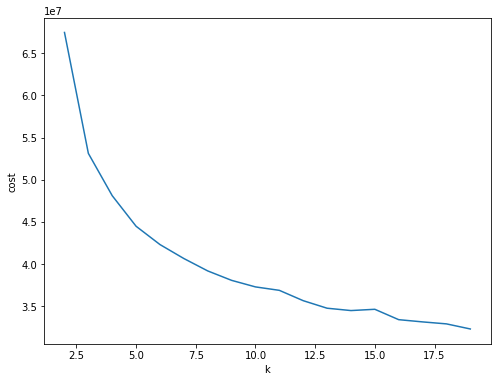

In [15]:
fig, ax = plt.subplots(1,1, figsize =(8,6))
ax.plot(range(2,20),cost[2:20])
ax.set_xlabel('k')
ax.set_ylabel('cost')

# Your Code



### 2.2 Executing K-Means for selected k

Could you tell out the optimized K value? 




****

<div class="alert alert-block alert-info">

**Code**: 
    You are required to choose a K value as 8 and then summarize each cluster with the count on Position_Group.

<div class="alert alert-block alert-warning">
    
**Report**: 
    **2.2** In your report with proper section title  '2.2', Please summarize the following:     
    <ol>
        <li> What you could find from those clusters (by cluster central point)? </li>
        <li> Is there any Position_Group belonging to particular Cluster?</li>
    </ol>

</div>
</div>




### **2.2: K-Means Clustering** 
#### **Cluster analysis**

In [16]:
k = 8
# Your code
kmeans = KMeans().setK(k).setSeed(1).setFeaturesCol("features")
model = kmeans.fit(df_kmeans)
centers = model.clusterCenters()

array= np.vstack(centers)
import pandas as pd
type(array)
cluster_centres= pd.DataFrame(array, columns= FEATURES_COL)
cluster_centres['cluster']= ['1','2','3','4','5','6','7','8']
cluster_centres


,Height(CM),Weight(KG),Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,cluster
0,177.331747,76.317944,58.416399,44.020614,62.791113,67.322034,42.538708,61.026111,52.179111,46.792945,63.551077,65.575813,65.252405,66.065964,64.627577,66.205680,64.105818,62.282639,70.520385,73.826386,72.673843,52.596885,71.434265,67.650481,53.270728,57.474576,48.979386,64.576271,66.671553,68.964727,66.889143,1
1,187.680263,81.706809,39.868438,30.212524,68.726755,59.716003,31.193548,44.543327,34.724858,33.426312,54.991145,55.461101,53.194813,55.605946,50.158760,62.979760,50.611638,51.142315,68.349779,64.290955,79.529412,34.243517,70.567995,67.063884,33.600253,41.735610,41.055661,61.129032,67.294118,69.611638,66.765338,2
2,172.466176,73.215085,65.189446,68.700692,57.795415,69.000433,64.560554,73.229239,67.018599,61.339965,60.862457,72.865484,76.230969,75.484429,76.858564,68.820934,73.341696,71.578720,66.421713,69.089533,63.619377,67.487889,56.358564,35.852509,70.454585,67.553633,65.270329,68.708045,36.981401,34.274654,30.684256,3
3,179.480395,76.008290,36.060831,24.841246,55.700297,47.258160,27.141691,39.071217,29.752967,28.676558,39.298961,45.006677,60.318991,60.531899,53.302671,53.134273,59.041543,38.190653,67.600890,60.880564,67.212166,25.610534,57.082344,56.229228,31.920623,34.706973,36.516320,47.675074,57.191395,60.847181,58.898368,4
4,171.831220,73.636652,67.455707,58.569015,58.093943,72.504326,57.661310,70.060981,66.779975,62.422332,69.034611,72.122373,69.906881,69.056448,71.967450,69.543469,71.484137,70.778327,67.386485,75.372064,67.246395,66.293778,68.817058,66.052740,65.211372,68.499382,59.716934,69.017717,63.461475,66.484137,63.407911,5
5,170.910165,69.059326,55.292346,55.095802,43.159012,60.047407,48.400494,64.168889,52.723951,46.470617,53.466667,62.815802,74.158025,73.067654,72.882963,54.819753,74.182222,58.154074,57.084938,59.055309,50.880000,51.040988,42.448889,30.003951,56.255802,56.670123,52.631111,55.064691,35.403457,33.610864,32.670617,6
6,179.044057,77.273769,41.525366,64.628523,62.523675,54.670800,54.124014,60.157272,45.931793,38.348929,40.625141,61.228861,67.103720,68.447576,63.393461,58.988162,61.213641,63.873732,66.865840,62.502818,69.780158,56.900789,48.685457,22.344419,62.615558,51.563134,61.207441,56.670800,27.092446,21.864149,19.754791,7
7,170.423643,71.651205,54.409790,39.528722,51.076052,60.990291,37.064320,58.461974,45.364078,40.249595,55.511731,59.909790,69.559871,69.156553,67.275485,58.088592,69.606796,50.264563,64.686084,67.796521,60.887540,42.326861,59.254450,56.585761,50.674353,51.526294,43.852346,53.676780,56.214806,59.438916,57.930825,8


**Visualization of cluster centres**

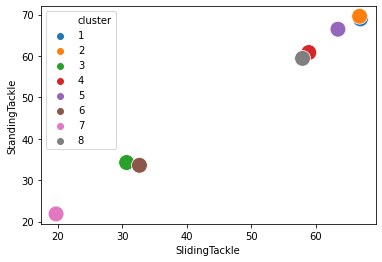

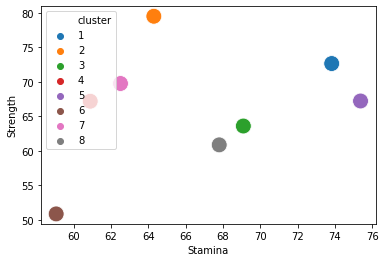

In [17]:

#Create figure

# Create scatterplot. alpha controls the opacity and s controls the size.
fig= plt.figure()
sns.scatterplot(data=cluster_centres, x= cluster_centres.SlidingTackle, y= cluster_centres.StandingTackle, s=250, hue= "cluster",   palette=["C0", "C1","C2", 'C3','C4','C5','C6','C7'])
fig= plt.figure()

sns.scatterplot(data=cluster_centres, x= cluster_centres.Stamina, y= cluster_centres.Strength, s=250, hue= "cluster",   palette=["C0", "C1","C2", 'C3','C4','C5','C6','C7'])



**Inference:**
- Cluster 4 is always low in all the skills
- Standing tackle and sliding tackle are linearly correlated and are effective in distinguishing the clusters

**Cluster Prediction**

In [18]:
from pyspark.sql import SQLContext

# Your code
#prediction of clusters
transformed = model.transform(df_kmeans).select('id', 'prediction')
rows = transformed.collect()
print(rows[:3])
np.vstack(rows)

# Create data frame
df_pred = spark.createDataFrame(rows)
#df_pred.show()

#join with original data
df_pred = df_pred.join(df_kmeans_new, 'id')
#df_pred.show()

#convert the result to pandas
pddf_pred = df_pred.toPandas().set_index('id')
pddf_pred.head(3)


[Row(id='158023', prediction=2), Row(id='20801', prediction=2), Row(id='190871', prediction=2)]


,prediction,Height(CM),Weight(KG),Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,Position,Position_Group
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
158023,2,173.735992,72.121124,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,RF,FWD
20801,2,188.975998,83.007339,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,ST,FWD
190871,2,179.832001,68.038803,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,LW,FWD


#### **Cluster Distribution analysis with respect to position groups**

**Distribution of Position Group within each cluster**

In [19]:
pddf_pred= pddf_pred.rename(columns={'prediction': 'cluster'})
pddf_pred['cluster']=pddf_pred['cluster']+1
pd.crosstab(pddf_pred.cluster, pddf_pred.Position_Group,normalize='index', margins=True)

Position_Group,DEF,FWD,MID
cluster,,,
1,0.557065,0.004982,0.437953
2,0.924731,0.001265,0.074004
3,0.001731,0.481177,0.517092
4,0.941964,0.000744,0.057292
5,0.250628,0.029707,0.719665
6,0.003943,0.263677,0.732380
7,0.000000,0.924285,0.075715
8,0.523829,0.015347,0.460824
All,0.363851,0.212008,0.424141


**Inference:**
- Cluster 5 and 7 are dominated by DEF
- Cluster 8 is dominated by FWD
- Cluster 1 and 6 is dominated by MID

**Distribution normalizing over all cluster and position group**

In [20]:
pd.crosstab(pddf_pred.cluster, pddf_pred.Position_Group,normalize='all', margins=True)

Position_Group,DEF,FWD,MID,All
cluster,,,,
1,0.076293,0.000682,0.059980,0.136956
2,0.090684,0.000124,0.007257,0.098065
3,0.000248,0.068974,0.074122,0.143344
4,0.078526,0.000062,0.004776,0.083364
5,0.037154,0.004404,0.106687,0.148245
6,0.000496,0.033184,0.092172,0.125853
7,0.000000,0.102221,0.008374,0.110594
8,0.080449,0.002357,0.070773,0.153579
All,0.363851,0.212008,0.424141,1.000000


**More Inference**
- All clusters are almost failly distributed containing 10 to 20% of all players
- Most players play in the MID position group followed by DEF and FWD

## Part 3 - Supervised Learning: Classification on Position_Group

<a id="classification"></a>
***

In last part, you use the player's skillset values to segment the players into 8 clusters. Now we want to see whether we could accuratly predict the position_group of the player.

*Remind: You must only use **PySpark** to complete the following data processing and model building. Otherwise, you lose all marks.*


### 3.1 Data Preparation

We remove the feature of position and use all other skillset features and the cluster prediction as the input for the model. Your target for classification is "Position_Group".

**Vector assembly of data**

In [21]:
FEATURES_COL_ = ['Height(CM)', 'Weight(KG)', 
                      'Crossing', 'Finishing', 'HeadingAccuracy', 
                      'ShortPassing', 'Volleys', 'Dribbling', 'Curve',
                      'FKAccuracy', 'LongPassing', 'BallControl', 
                      'Acceleration', 'SprintSpeed', 'Agility', 
                      'Reactions', 'Balance', 'ShotPower', 'Jumping', 
                      'Stamina', 'Strength', 'LongShots', 'Aggression', 
                      'Interceptions', 'Positioning', 'Vision', 'Penalties', 
                      'Composure', 'Marking', 'StandingTackle', 'SlidingTackle','prediction']
#changed Cluster-> prediction

vecAssembler_ = VectorAssembler(inputCols=FEATURES_COL_, outputCol="features")
df_class_ = vecAssembler_.transform(df_pred).select('features','Position_Group')
df_class_.show(3)


+--------------------+--------------+
|            features|Position_Group|
+--------------------+--------------+
|[173.735992431640...|           FWD|
|[188.975997924804...|           FWD|
|[179.832000732421...|           FWD|
+--------------------+--------------+
only showing top 3 rows



In many data science modeling work, feature scaling is very important.
In here, we use standard scaling on the fetaures.

**Feature Scaling**

In [22]:
from pyspark.ml.feature import StandardScaler

standardscaler=StandardScaler().setInputCol("features").setOutputCol("Scaled_features")
raw_data=standardscaler.fit(df_class_).transform(df_class_)
raw_data.select("features","Scaled_features",'Position_Group').show(3)

+--------------------+--------------------+--------------+
|            features|     Scaled_features|Position_Group|
+--------------------+--------------------+--------------+
|[173.735992431640...|[12.9261366722264...|           FWD|
|[188.975997924804...|[14.0600087682323...|           FWD|
|[179.832000732421...|[13.3796859647366...|           FWD|
+--------------------+--------------------+--------------+
only showing top 3 rows



In Spark, you could not use string as Target data type, Please encode the Position_Group column by using following encoding: 

FWD = 0
DEF = 1
MID = 2

*Hint: Data type after encoding should be numeric.*

**Label encoding on target**

In [0]:
raw_data_ = raw_data.withColumn('Target',when(col("Position_Group") == "DEF", 1)
      .when(col("Position_Group")== "FWD", 0)
      .otherwise(2))

### 3.2 Training Test Evaluation

We remove the feature of position and use all other skillset features and the cluster prediction as the input for the model. The target for classification is "Position_Group".

Now, we split your data into train/Test, and evaluate one model's performance.

**Train test split in 70-30**

In [0]:
train, test = raw_data_.randomSplit([0.7, 0.3], seed=12)

**Model definition, fitting and prediction**

In [25]:
from pyspark.ml.classification import LogisticRegression
lr = LogisticRegression(labelCol="Target", featuresCol="Scaled_features",maxIter=10)
model=lr.fit(train)

predict_train=model.transform(train)
predict_test=model.transform(test)
predict_test.select("Target","prediction").show(5)


+------+----------+
|Target|prediction|
+------+----------+
|     2|       2.0|
|     2|       2.0|
|     0|       0.0|
|     0|       0.0|
|     2|       2.0|
+------+----------+
only showing top 5 rows



**Inference:**


*   Data has been prepared in the vectorised form
*   Feature scaling has been performed
*   Train test split has been performed in 70-30 ratio
*   Logistic Regression model has been defined
*   Model has been fitted on the train data
*   The trained model has been used to predict using test data






****


<div class="alert alert-block alert-info">

**Code**: 
    You are required to evaluate the model by using confusion matrix. Please also print out your model's Precision, Recall and F1 score.

<div class="alert alert-block alert-warning">
    
**Report**: 
    **3.2** In your report with proper section title  '3.2', Please summarize the following:     
    <ol>
        <li> The confusion matrix </li>
        <li> The Precision, Recall and F1 score</li>
    </ol>
</div>
</div>




### **Section 3.2: Classification model performance evaluation**

**Generation of Confusion matrix**

,MID,DEF,FWD
MID,1637,240,194
DEF,307,1466,2
FWD,210,7,821


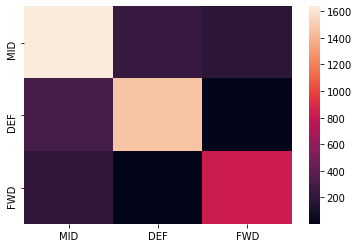

In [26]:
predict_test, test
temp_df= predict_test.select("Target","prediction").toPandas()
temp_df= temp_df.replace({2:'MID',1:'DEF',0:'FWD'})
from sklearn.metrics import confusion_matrix
cm= confusion_matrix(temp_df.Target,temp_df.prediction, labels=['MID','DEF','FWD'] ) 
cm= pd.DataFrame(cm, index= ['MID','DEF','FWD'], columns=['MID','DEF','FWD'])
sns.heatmap(cm)
cm
# Your Code


**Inference:**
- The Confusion Matrix has been generated for the prediction of Position Group
- Most of the predictions lie along the diagonal representing correct prediction
- For DEF, some samples are misclassified as MID
- For MID, some samples are misclassified as DEF and FWD
- For FWD, some samples are misclassified as MID


**Model Precision, Recall and F1 score**

In [27]:
from sklearn.metrics import classification_report

# Your Code
report= classification_report(temp_df.Target,temp_df.prediction, labels=['MID','DEF','FWD'] )
print(report)

              precision    recall  f1-score   support

         MID       0.76      0.79      0.77      2071
         DEF       0.86      0.83      0.84      1775
         FWD       0.81      0.79      0.80      1038

    accuracy                           0.80      4884
   macro avg       0.81      0.80      0.80      4884
weighted avg       0.80      0.80      0.80      4884



**Inference:**
- Precision for the positions are summarised in the above table
- Recall for the positions are summarised in the above table
- F1-Score for the positions are summarised in the above table


### 3.3 K-fold Cross-Validation

We surely missed something during the modeling work -- Hyperparameter tuning! We can use K-fold cross validation to find out the best hyperparameter set.

****


<div class="alert alert-block alert-info">

**Code**: 
    Please implement K-fold cross validation for three (any three) classification models.

<div class="alert alert-block alert-warning">
    
**Report**: 
    **3.3** In your report with proper section title  '3.3', Please summarize the following:     
    <ol>
        <li> Your code design and running results </li>
        <li> Your findings on hyperparameters based on this cross-validation results</li>
        <li> Any difficuties you had </li>
        <li> Any other possible tasks we could do on this dataset </li>
    </ol>
<b>Remind: fail to list the reference will lead a penalty and possibly plagiarism</b>    
</div>
</div>



**Loading Libraries**

In [0]:
from pyspark.ml import Pipeline
from pyspark.ml.classification import RandomForestClassifier
from pyspark.ml.classification import LogisticRegression
from pyspark.ml.classification import DecisionTreeClassifier
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.ml.tuning import ParamGridBuilder, CrossValidator
# Your code 
# reference: https://spark.apache.org/docs/2.2.0/ml-tuning.html

**Hyperparameter tuning for different models**

In [29]:
# Your code


#######-----------------------------------------------------------------------------------
#### Decision Tree
print('----------------------------\n\n1 Decision Tree')

estimator = DecisionTreeClassifier(labelCol="Target", featuresCol="Scaled_features")
# Search through decision tree's maxDepth parameter for best model
paramGrid = ParamGridBuilder().addGrid(estimator.maxDepth, [2,3,4,5,6,7]).build()

def tuning_function(estimator, paramGrid):
  """
  Define evaluator
  Define CV by passing estimator, paramgrid, evaluator
  fit/ tune 
  extract best model
  evaluate on test data
  """
  # Set F-1 score as evaluation metric for best model selection
  evaluator = MulticlassClassificationEvaluator(labelCol='Target',
                                              predictionCol='prediction', metricName='f1')    

  # Set up 3-fold cross validation
  crossval = CrossValidator(estimator=estimator,
                          estimatorParamMaps= paramGrid,
                          evaluator= evaluator,
                          numFolds= 3)

  # tune/ fit model
  CV_model = crossval.fit(train)

  # Fetch best model
  best_estimator = CV_model.bestModel
  
  transformed_data = best_estimator.transform(test)
  performance_metric= evaluator.evaluate(transformed_data)

  print("--------------\nestimator name: "+str(best_estimator))
  print("--------------\nestimator tuned hyperparameters")
  print(best_estimator.getParam)
  print("--------------\nestimator performance")
  print(evaluator.getMetricName()+' : '+str(performance_metric))
  return best_estimator

tuning_function(estimator, paramGrid)

#######-----------------------------------------------------------------------------------
print('----------------------------\n\n2 LogisticRegression')


estimator = LogisticRegression(labelCol="Target", featuresCol="Scaled_features")
paramGrid = ParamGridBuilder().addGrid(estimator.regParam, [0.01, 0.1]).addGrid(estimator.elasticNetParam, [1.0, 0.5]).build()
tuning_function(estimator, paramGrid)


#######-----------------------------------------------------------------------------------
print('----------------------------\n\n3 Random Forest')

estimator = RandomForestClassifier(labelCol="Target", featuresCol="Scaled_features")

paramGrid = ParamGridBuilder() \
    .addGrid(estimator.numTrees, [int(x) for x in np.linspace(start = 10, stop = 50, num = 3)]) \
    .addGrid(estimator.maxDepth, [int(x) for x in np.linspace(start = 5, stop = 25, num = 3)]) \
    .build()

tuning_function(estimator, paramGrid)

print("printed")


----------------------------

1 Decision Tree
--------------
estimator name: DecisionTreeClassificationModel (uid=DecisionTreeClassifier_9f1698657051) of depth 7 with 193 nodes
--------------
estimator tuned hyperparameters
<bound method Params.getParam of DecisionTreeClassificationModel (uid=DecisionTreeClassifier_9f1698657051) of depth 7 with 193 nodes>
--------------
estimator performance
f1 : 0.8277837036324049
----------------------------

2 LogisticRegression
--------------
estimator name: LogisticRegressionModel: uid = LogisticRegression_3fdb3bfdec7a, numClasses = 3, numFeatures = 32
--------------
estimator tuned hyperparameters
<bound method Params.getParam of LogisticRegressionModel: uid = LogisticRegression_3fdb3bfdec7a, numClasses = 3, numFeatures = 32>
--------------
estimator performance
f1 : 0.8456280616443363
----------------------------

3 Random Forest
--------------
estimator name: RandomForestClassificationModel (uid=RandomForestClassifier_90dc8381a07e) with 50 tree

**Inference:**
- Decision Tree, Logitric Regression and Random forest has been utilized for performance comparison after tuning
- F1- score has been used as the primary evaluation metric
- Parameter grid has been defined for each model and all the tuning logic has been designed in a custom function named 'tuning_function()'. This function consumed the estimator and corresponding parameter grid object and executes the process of tuning and evaluation using 3 fold cv.
- The final hyperparameters tuned for three models can be summarised as below:
 -  Decision Tree: Tree Depth
 -  Logistic Regression: Regularization Parameter, elastic Net Parameter
 -  Random Forest: Number of Trees, max depth
- The final performance of three models can be summarised as below:
 -  Decision Tree: .8470
 -  Logistic Regression: .8624
 -  Random Forest: .8833

## PART 4: Further analysis


### 4.1 Finding the rising star
We filtered out players less than 20 years of age and compared them on Overall and Potential. 


In [37]:
query="""
select ID, Name, Age, Overall, Potential
from Table
where Age <= 20
order by Potential desc
limit 3
"""
spark.sql(query).show()


+------+-----------------+---+-------+---------+
|    ID|             Name|Age|Overall|Potential|
+------+-----------------+---+-------+---------+
|231747|       K. Mbapp��| 19|     88|       95|
|230621|    G. Donnarumma| 19|     82|       93|
|238794|Vin��cius J��nior| 17|     77|       92|
+------+-----------------+---+-------+---------+



**Inference**
K. Mbapp is the rising star. Age is just 19 years and has high overall and potential.


### 4.2 Players having best stamina and Strength
We filtered out players raing top among both strength and stamina 


In [44]:
query="""
select ID, Name, Strength, Stamina, (strength+stamina)/2 as Balance_score
from Table
order by Balance_score desc
limit 3
"""
spark.sql(query).show()


+------+----------+--------+-------+-------------+
|    ID|      Name|Strength|Stamina|Balance_score|
+------+----------+--------+-------+-------------+
|230938|F. Kessi��|      87|     96|         91.5|
|219470| C. N'Doye|      93|     90|         91.5|
|199284|D. Hediger|      92|     90|         91.0|
+------+----------+--------+-------+-------------+



**Inference**
F. Kessi, C. N'Doye and D. Hediger have both strength and stamina


### References:
https://www.bmc.com/blogs/python-spark-machine-learning-classification/
https://spark.apache.org/docs/2.3.1/sql-programming-guide.html
https://spark.apache.org/docs/2.2.0/ml-tuning.html
https://rsandstroem.github.io/sparkkmeans.html
https://s3.amazonaws.com/assets.datacamp.com/blog_assets/PySpark_SQL_Cheat_Sheet_Python.pdf